# Web Scrapping for News Article

In [2]:
from datetime import date
today = date.today()
d = today.strftime("%m-%d-%y")
print("date = ",d)

date =  07-03-20


# Extracting text from url for news article

In [3]:
#url = "https://edition.cnn.com/{}/india/delhi-hospital-crisis-coronavirus-hnk-intl/index.html".format(d)
#url = "https://timesofindia.indiatimes.com/india/pending-cbse-class-x-xii-exams-cancelled-centre-tells-sc/articleshow/76622960.cms"
#url = "https://www.gutenberg.org/files/2701/2701-h/2701-h.htm"
url = "https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-total-toll-past-15000/liveblog/76634848.cms"

In [4]:
print(url)

https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-total-toll-past-15000/liveblog/76634848.cms


In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
response = requests.get(url)
type(response)

requests.models.Response

In [7]:
soup_dos = BeautifulSoup(response.content, "lxml")
#cleantext = BeautifulSoup(raw_html, "lxml").text

In [8]:
soup_dos.title

<title>Coronavirus in India live updates: 8 states contributed 85% Covid-19 caseload, 87% deaths, says Health ministry </title>

In [9]:
soup_dos.title.string

'Coronavirus in India live updates: 8 states contributed 85% Covid-19 caseload, 87% deaths, says Health ministry '

In [10]:
soup_dos.findAll('a')[:8]

[<a href="https://navbharattimes.indiatimes.com/" rel="nofollow noopener noreferrer" target="_blank">हिन्दी</a>,
 <a href="https://maharashtratimes.indiatimes.com" rel="nofollow noopener noreferrer" target="_blank">मराठी</a>,
 <a href="https://eisamay.indiatimes.com" rel="nofollow noopener noreferrer" target="_blank">বাংলা<!-- --> </a>,
 <a href="https://www.iamgujarat.com/" rel="nofollow noopener noreferrer" target="_blank">ગુજરાતી</a>,
 <a href="https://vijaykarnataka.indiatimes.com/" rel="nofollow noopener noreferrer" target="_blank">ಕನ್ನಡ</a>,
 <a href="https://tamil.samayam.com" rel="nofollow noopener noreferrer" target="_blank">தமிழ்</a>,
 <a href="https://telugu.samayam.com" rel="nofollow noopener noreferrer" target="_blank">తెలుగు</a>,
 <a href="https://malayalam.samayam.com" rel="nofollow noopener noreferrer" target="_blank">മലയാളം</a>]

In [11]:
text = soup_dos.get_text()

In [39]:
text[:2000]

'Coronavirus in India live updates: 8 states contributed 85% Covid-19 caseload, 87% deaths, says Health ministry     {              "@context": "http://schema.org",              "@type": "Organization",              "name": "Times of India",              "url":"https://timesofindia.indiatimes.com",              "logo":{              "@type":"ImageObject",            "url":"https://timesofindia.indiatimes.com/photo/58127550.cms",            "width":600,            "height":60              }            }            {"@context":"https://schema.org","@type":"LiveBlogPosting","url":"https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-total-toll-past-15000/liveblog/76634848.cms","coverageStartTime":"2020-06-26T03:49:19+05:30","headline":"Coronavirus live updates: Total lockdown every Sunday in Karnataka from July 5","description":"Coronavirus update: India\'s Covid-19 tally crossed 5 lakh mark with yet another highest single-day spike of 18,552 new cases. The country rec

# Preprocessing and cleaning the text

In [40]:
appendingmode_bool = True
output_str = ''
for char_str in text:
    if char_str == '>':
        appendingmode_bool = False
    elif char_str == '<':
        appendingmode_bool = True
        continue
    if appendingmode_bool:
        output_str += char_str

In [43]:
text = output_str
text[:2000]

'Coronavirus in India live updates: 8 states contributed 85% Covid-19 caseload, 87% deaths, says Health ministry     {              "@context": "http://schema.org",              "@type": "Organization",              "name": "Times of India",              "url":"https://timesofindia.indiatimes.com",              "logo":{              "@type":"ImageObject",            "url":"https://timesofindia.indiatimes.com/photo/58127550.cms",            "width":600,            "height":60              }            }            {"@context":"https://schema.org","@type":"LiveBlogPosting","url":"https://timesofindia.indiatimes.com/india/coronavirus-india-live-updates-total-toll-past-15000/liveblog/76634848.cms","coverageStartTime":"2020-06-26T03:49:19+05:30","headline":"Coronavirus live updates: Total lockdown every Sunday in Karnataka from July 5","description":"Coronavirus update: India\'s Covid-19 tally crossed 5 lakh mark with yet another highest single-day spike of 18,552 new cases. The country rec

In [44]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [46]:
text=text.replace('{html}',"")
text = re.sub('<[^<]+?>', '', text)
cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6}|);')
cleantext = re.sub(cleanr, '', text)
rem_url=re.sub(r'http\S+', '',cleantext)
rem_num = re.sub('[0-9]+', '', rem_url)
rem_num[:2000]

'Coronavirus in India live updates:  states contributed % Covid- caseload, % deaths, says Health ministry     {              "@context": "              "@type": "Organization",              "name": "Times of India",              "url":"              "logo":{              "@type":"ImageObject",            "url":"            "width":,            "height":              }            }            {"@context":" live updates: Total lockdown every Sunday in Karnataka from July ","description":"Coronavirus update: India\'s Covid- tally crossed  lakh mark with yet another highest single-day spike of , new cases. The country recorded  fatalities in last  hours, taking the nationwide toll to ,.","image":{"@type":"ImageObject","contentUrl":" Coronavirus India, Coronavirus in India, COVID-, India Coronavirus cases, Coronavirus cases in India, India, COVID- news","publisher":{"@type":"Organization","name":"Times Of India","logo":{"@type":"ImageObject","url":" Of India"},"liveBlogUpdate":[{"@type":"Bl

# Tokenization

In [47]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(rem_num)

In [51]:
tokens[:15]

['Coronavirus',
 'in',
 'India',
 'live',
 'updates',
 'states',
 'contributed',
 'Covid',
 'caseload',
 'deaths',
 'says',
 'Health',
 'ministry',
 'context',
 'type']

In [52]:
# Initialize new list, make all tokens in lower case
words = []
for word in tokens:
    words.append(word.lower())
words[:20]

['coronavirus',
 'in',
 'india',
 'live',
 'updates',
 'states',
 'contributed',
 'covid',
 'caseload',
 'deaths',
 'says',
 'health',
 'ministry',
 'context',
 'type',
 'organization',
 'name',
 'times',
 'of',
 'india']

# Remove stop Words

In [53]:
word = [w for w in words if len(w) > 2 if not w in stopwords.words('english')]
filtered_tokens = [w for w in word if len(w) < 15 if not w in stopwords.words('english')]

In [54]:
filtered_tokens = [w for w in word if len(w) < 15 if not w in stopwords.words('english')]


In [55]:
filtered_tokens[:20]

['coronavirus',
 'india',
 'live',
 'updates',
 'states',
 'contributed',
 'covid',
 'caseload',
 'deaths',
 'says',
 'health',
 'ministry',
 'context',
 'type',
 'organization',
 'name',
 'times',
 'india',
 'url',
 'logo']

# Stemmer

In [56]:
#stem_words=[stemmer.stem(w) for w in filtered_tokens]
#stem_words

In [57]:
#lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
lemma_words=[lemmatizer.lemmatize(w) for w in filtered_tokens]
lemma_words[:20]

['coronavirus',
 'india',
 'live',
 'update',
 'state',
 'contributed',
 'covid',
 'caseload',
 'death',
 'say',
 'health',
 'ministry',
 'context',
 'type',
 'organization',
 'name',
 'time',
 'india',
 'url',
 'logo']

In [25]:
stopwors = ['logo','url','imageobject','type','blogposting','headline','context','width','height','contenturl','blogposting','image']

for word in list(lemma_words):  # iterating on a copy since removing will mess things up
       if word in stopwors:
            lemma_words.remove(word)

In [59]:
r = " ".join(lemma_words)
# 'rabbit' is removed
r[:1000]

'coronavirus india live update state contributed covid caseload death say health ministry context type organization name time india url logo type imageobject url width height context live update total lockdown every sunday karnataka july description coronavirus update india covid tally crossed lakh mark yet another highest single day spike new case country recorded fatality last hour taking nationwide toll image type imageobject contenturl coronavirus india coronavirus india covid india coronavirus case coronavirus case india india covid news publisher type organization name time india logo type imageobject url india liveblogupdate type blogposting headline ist able control pandemic would need lockdown go url india logo type imageobject url india able control pandemic would need lockdown go type blogposting headline ist karnataka government issue order directing private hospital deny treatment patie url india logo type imageobject url india government issue order directing private hosp

# Tokenization

In [63]:
tokens = tokenizer.tokenize(r)
tokens[:20]

['coronavirus',
 'india',
 'live',
 'update',
 'state',
 'contributed',
 'covid',
 'caseload',
 'death',
 'say',
 'health',
 'ministry',
 'context',
 'type',
 'organization',
 'name',
 'time',
 'india',
 'url',
 'logo']

# POS TAGGING

In [64]:
pos_tags = nltk.pos_tag(filtered_tokens)
pos_tags[:20]

[('coronavirus', 'NN'),
 ('india', 'NN'),
 ('live', 'JJ'),
 ('updates', 'NNS'),
 ('states', 'NNS'),
 ('contributed', 'VBD'),
 ('covid', 'JJ'),
 ('caseload', 'NN'),
 ('deaths', 'NNS'),
 ('says', 'VBZ'),
 ('health', 'NN'),
 ('ministry', 'NN'),
 ('context', 'NN'),
 ('type', 'NN'),
 ('organization', 'NN'),
 ('name', 'NN'),
 ('times', 'NNS'),
 ('india', 'VBP'),
 ('url', 'JJ'),
 ('logo', 'NN')]

# Chunk Parser

In [29]:
grammar = "NP: {<DT>?<JJ>*<NN><NNP><VBZ>?}"
#Using above defined grammer, created chunk parser
cp = nltk.RegexpParser(grammar)
#apply parser on pos tags
result = cp.parse(pos_tags)

In [65]:
print(result[:20])

[('coronavirus', 'NN'), ('india', 'NN'), ('live', 'JJ'), ('updates', 'NNS'), ('states', 'NNS'), ('contributed', 'VBD'), ('covid', 'JJ'), ('caseload', 'NN'), ('deaths', 'NNS'), ('says', 'VBZ'), ('health', 'NN'), ('ministry', 'NN'), ('context', 'NN'), ('type', 'NN'), ('organization', 'NN'), ('name', 'NN'), ('times', 'NNS'), ('india', 'VBP'), ('url', 'JJ'), ('logo', 'NN')]


In [31]:
# draw the tree
#result.draw()

In [66]:
print(nltk.ne_chunk(pos_tags, binary=True)[:20])

[('coronavirus', 'NN'), ('india', 'NN'), ('live', 'JJ'), ('updates', 'NNS'), ('states', 'NNS'), ('contributed', 'VBD'), ('covid', 'JJ'), ('caseload', 'NN'), ('deaths', 'NNS'), ('says', 'VBZ'), ('health', 'NN'), ('ministry', 'NN'), ('context', 'NN'), ('type', 'NN'), ('organization', 'NN'), ('name', 'NN'), ('times', 'NNS'), ('india', 'VBP'), ('url', 'JJ'), ('logo', 'NN')]


# using spacy tool:NER

In [67]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(r)
for X in doc.ents[:50]:
    print(X.text, X.label_)

coronavirus india ORG
india GPE
karnataka TIME
july DATE
india GPE
last hour TIME
contenturl coronavirus PERSON
india GPE
india GPE
india GPE
coronavirus ORG
india GPE
india GPE
india GPE
india GPE
india GPE
india GPE
karnataka PERSON
india GPE
india GPE
maharashtra ORG
india GPE
india GPE
maharashtra ORG
india GPE
india GPE
maharashtra ORG
india GPE
india GPE
maharashtra ORG
today DATE
india GPE
india GPE
haryana PERSON
today DATE
india GPE
india GPE
jammu kashmir LOC
saturday DATE
india GPE
india GPE
jammu kashmir LOC
saturday DATE
karnataka PERSON
sunday DATE
july DATE
india GPE
india GPE
karnataka PERSON
sunday DATE


In [69]:
#print([(X, X.ent_iob_, X.ent_type_) for X in doc])
for X in doc[:50]:
    print(X, X.ent_iob_, X.ent_type_)

coronavirus B ORG
india I ORG
live O 
update O 
state O 
contributed O 
covid O 
caseload O 
death O 
say O 
health O 
ministry O 
context O 
type O 
organization O 
name O 
time O 
india B GPE
url O 
logo O 
type O 
imageobject O 
url O 
width O 
height O 
context O 
live O 
update O 
total O 
lockdown O 
every O 
sunday O 
karnataka B TIME
july B DATE
description O 
coronavirus O 
update O 
india B GPE
covid O 
tally O 
crossed O 
lakh O 
mark O 
yet O 
another O 
highest O 
single O 
day O 
spike O 
new O 


In [70]:
#length of an entities
len(doc.ents)

182

In [71]:
from collections import Counter
labels = [x.label_ for x in doc.ents]
Counter(labels)

Counter({'ORG': 19,
         'GPE': 67,
         'TIME': 3,
         'DATE': 38,
         'PERSON': 29,
         'LOC': 4,
         'NORP': 3,
         'CARDINAL': 14,
         'LAW': 1,
         'ORDINAL': 2,
         'WORK_OF_ART': 1,
         'PRODUCT': 1})

In [80]:
from spacy import displacy
displacy.render(doc[:200], style='ent')

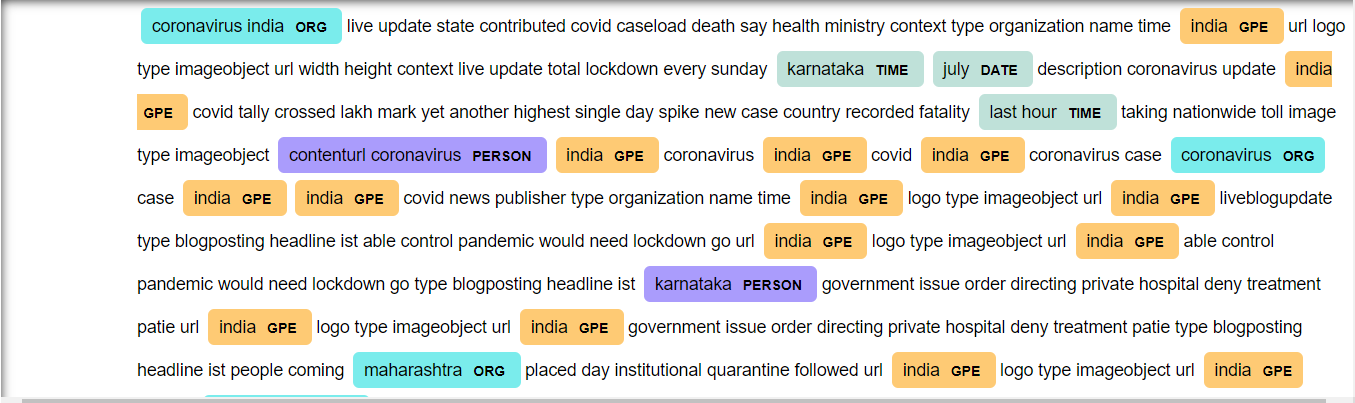